In [1]:
import sys
sys.path.insert(0,"/home/yunye/gwaslab/gwaslab/src")
import gwaslab as gl

In [2]:
mysumstats = gl.Sumstats("t2d_bbj.txt.gz",
             snpid="SNP",
             chrom="CHR",
             pos="POS",
             se="SE",
             p="P",nrows=1000000)

Sat Oct 29 21:59:14 2022 Start to initiate from file :t2d_bbj.txt.gz
Sat Oct 29 21:59:15 2022  -Reading columns          : SE,CHR,POS,P,SNP
Sat Oct 29 21:59:15 2022  -Renaming columns to      : SE,CHR,POS,P,SNPID
Sat Oct 29 21:59:15 2022  -Current dataframe shape  : Rows  1000000  x  5  Columns
Sat Oct 29 21:59:15 2022  -Initiating a status column ...
Sat Oct 29 21:59:15 2022  -Reordering columns to    : SNPID,CHR,POS,SE,P,STATUS
Sat Oct 29 21:59:16 2022 Finished loading data successfully!


In [3]:
mysumstats.basic_check()

Sat Oct 29 15:08:38 2022 Start to check IDs...
Sat Oct 29 15:08:38 2022  -Current Dataframe shape : 1000000  x  6
Sat Oct 29 15:08:38 2022  -Checking if SNPID is chr:pos:ref:alt...(separator: - ,: , _)
Sat Oct 29 15:08:39 2022 Finished checking IDs successfully!
Sat Oct 29 15:08:39 2022 Start to fix chromosome notation...
Sat Oct 29 15:08:39 2022  -Current Dataframe shape : 1000000  x  6
Sat Oct 29 15:08:41 2022  -All CHR are already fixed...
Sat Oct 29 15:08:43 2022 Finished fixing chromosome notation successfully!
Sat Oct 29 15:08:43 2022 Start to fix basepair positions...
Sat Oct 29 15:08:43 2022  -Current Dataframe shape : 1000000  x  6
Sat Oct 29 15:08:44 2022  -Position upper_bound is: 250,000,000
Sat Oct 29 15:08:46 2022  -Remove outliers: 0
Sat Oct 29 15:08:46 2022  -Converted all position to datatype Int64.
Sat Oct 29 15:08:46 2022 Finished fixing basepair position successfully!
Sat Oct 29 15:08:46 2022 EA and NEA not detected..skipping...
Sat Oct 29 15:08:46 2022 Start sanity

In [4]:
mysumstats.fill_data(to_fill="MLOG10P")

Sat Oct 29 15:08:47 2022 Start filling data using existing columns...
Sat Oct 29 15:08:47 2022  -Raw input columns:  ['SNPID', 'CHR', 'POS', 'SE', 'P', 'STATUS']
Sat Oct 29 15:08:47 2022  -Overwrite mode:  False
Sat Oct 29 15:08:47 2022   - Skipping columns:  []
Sat Oct 29 15:08:47 2022 Filling columns:  ['MLOG10P']
Sat Oct 29 15:08:47 2022   - Filling MLOG10P using P column...
Sat Oct 29 15:08:47 2022 Finished filling data using existing columns.


In [6]:
mysumstats.get_lead()

Sat Oct 29 15:08:47 2022 Start to extract lead variants...
Sat Oct 29 15:08:47 2022  -Processing 1000000 variants...
Sat Oct 29 15:08:47 2022  -Significance threshold : 5e-08
Sat Oct 29 15:08:47 2022  -Sliding window size: 500  kb
Sat Oct 29 15:08:47 2022   - Filling P value using MLOG10P column...
Sat Oct 29 15:08:47 2022  -Found 543 significant variants in total...
Sat Oct 29 15:08:47 2022  -Identified 4 lead variants!
Sat Oct 29 15:08:47 2022 Finished extracting lead variants successfully!


,SNPID,CHR,POS,SE,MLOG10P,STATUS,P
96739,1:22068326_A_G,1,22068326,0.0103,8.788079,9960999,1.629000e-09
213860,1:51103268_T_C,1,51103268,0.0120,10.598772,9960999,2.519000e-11
534095,1:154309595_TA_T,1,154309595,0.0166,7.482936,9960999,3.289000e-08
969974,2:640986_CACAT_C,2,640986,0.0150,9.574303,9960999,2.665000e-10


In [8]:
novel = mysumstats.get_novel(known="./known_loci.txt")

Sat Oct 29 15:32:44 2022 Start to extract lead variants...
Sat Oct 29 15:32:44 2022  -Processing 1000000 variants...
Sat Oct 29 15:32:44 2022  -Significance threshold : 5e-08
Sat Oct 29 15:32:44 2022  -Sliding window size: 500  kb
Sat Oct 29 15:32:44 2022   - Filling P value using MLOG10P column...
Sat Oct 29 15:32:44 2022  -Found 543 significant variants in total...
Sat Oct 29 15:32:44 2022  -Identified 4 lead variants!
Sat Oct 29 15:32:44 2022 Finished extracting lead variants successfully!
Sat Oct 29 15:32:44 2022 Start to check if lead variants are known...
Sat Oct 29 15:32:44 2022  -Lead variants in known loci: 2
Sat Oct 29 15:32:44 2022  -Checking the minimum distance between identified lead variants and provided known variants...
Sat Oct 29 15:32:44 2022  -Identified  2  known vairants in current sumstats...
Sat Oct 29 15:32:44 2022  -Identified  2  novel vairants in current sumstats...
Sat Oct 29 15:32:44 2022 Finished checking known or novel successfully!


In [9]:
novel

,SNPID,CHR,POS,SE,MLOG10P,STATUS,P,TCHR+POS,DISTANCE_TO_KNOWN,NOVEL
0,1:22068326_A_G,1,22068326,0.0103,8.788079,9960999,1.629000e-09,1022068326,29034942,True
3,2:640986_CACAT_C,2,640986,0.0150,9.574303,9960999,2.665000e-10,2000640986,846331391,True


Sat Oct 29 15:33:02 2022 Start to plot manhattan/qq plot with the following basic settings:
Sat Oct 29 15:33:02 2022  -Genome-wide significance level is set to 5e-08 ...
Sat Oct 29 15:33:02 2022  -Raw input contains 1000000 variants...
Sat Oct 29 15:33:02 2022  -Plot layout mode is : mqq
Sat Oct 29 15:33:02 2022  -Variants to annotate : 1:22068326_A_G,2:640986_CACAT_C
Sat Oct 29 15:33:02 2022  -Loci to highlight : 1:22068326_A_G,2:640986_CACAT_C
Sat Oct 29 15:33:02 2022  -Highlight_window is set to:  500  kb
Sat Oct 29 15:33:03 2022 Finished loading specified columns from the sumstats.
Sat Oct 29 15:33:03 2022 Start conversion and sanity check:
Sat Oct 29 15:33:03 2022  -Removed 0 variants with nan in CHR or POS column ...
Sat Oct 29 15:33:03 2022  -Removed 0 variants with nan in P column ...
Sat Oct 29 15:33:03 2022  -P values are already converted to -log10(P)!
Sat Oct 29 15:33:03 2022  -Maximum -log10(P) values is 10.598771832501887 .
Sat Oct 29 15:33:03 2022 Finished data conversio

INFO:pyensembl.database:Creating database: /home/yunye/gwaslab/gwaslab/src/gwaslab/data/Ensembl/release75/Homo_sapiens.GRCh37.75.protein_coding.gtf.db
INFO:pyensembl.database:Reading GTF from /home/yunye/gwaslab/gwaslab/src/gwaslab/data/Ensembl/release75/Homo_sapiens.GRCh37.75.protein_coding.gtf.gz


Sat Oct 29 15:33:06 2022  -Highlighting target loci...
Sat Oct 29 15:33:06 2022  -Found 2 specified variants to annotate...
Sat Oct 29 15:33:06 2022 Start to annotate variants with nearest gene name(s)...
Sat Oct 29 15:33:06 2022  -Assigning Gene name using built-in Ensembl Release 75  (hg19)


/home/yunye/anaconda3/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
/home/yunye/anaconda3/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'gene_biotype', 'transcript_name', 'exon_number', 'exon_id', 'ccds_id', 'protein_id']
INFO:root:Using column 'source' to replace missing 'transcript_biotype'
INFO:datacache.database_helpers:Creating database /home/yunye/gwaslab/gwaslab/src/gwaslab/data/Ensembl/release75/Homo_sapiens.GRCh37.75.protein_coding.gtf.db containing: start_codon, CDS, gene, transcript, exon, stop_codon
INFO:datacache.database:Running sqlite query: "CRE

Sat Oct 29 15:34:07 2022 Finished annotating variants with nearest gene name(s) successfully!
Sat Oct 29 15:34:07 2022 Finished creating Manhattan plot successfully!
Sat Oct 29 15:34:07 2022  -Annotating using column GENENAME...
Sat Oct 29 15:34:07 2022 Start to create QQ plot with 1000000 variants:
Sat Oct 29 15:34:07 2022  -Calculating GC using P : 1.2400247573054366
Sat Oct 29 15:34:07 2022 Finished creating QQ plot successfully!


(<Figure size 1500x500 with 2 Axes>, <gwaslab.Log.Log at 0x7f4968b91f10>)

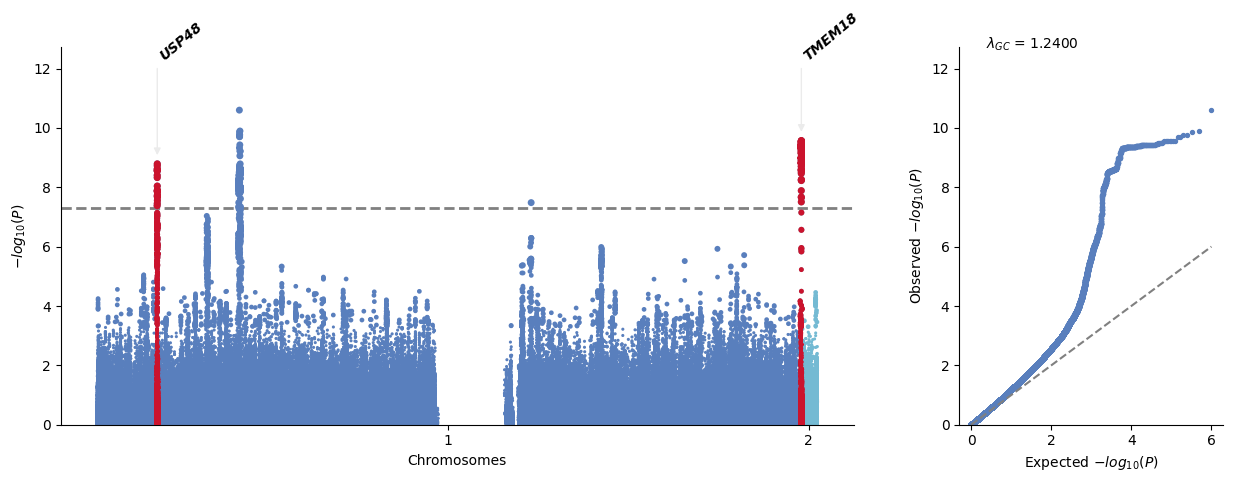

In [11]:
mysumstats.plot_mqq(highlight=novel["SNPID"],scaled=True,anno_set=novel["SNPID"],anno="GENENAME")